IMPORTING LIBRARIES

In [3]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install --upgrade pip
%pip install nltk
%pip install gensim
%pip install scikit-learn
%pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

In [8]:
resume_df = pd.read_csv('C:\\Users\\Mukund\\Desktop\\Resume Selection Project\\Data.csv', encoding='latin-1')
resume_df

,resume_id,class,resume_text
0,resume_1,not_flagged,Customer Service Supervisor/Tier - Isabella Ca...
1,resume_2,not_flagged,Engineer / Scientist - IBM Microelectronics Di...
2,resume_3,not_flagged,LTS Software Engineer Computational Lithograph...
3,resume_4,not_flagged,TUTORWilliston VT - Email me on Indeed: indee...
4,resume_5,flagged,Independent Consultant - Self-employedBurlingt...
...,...,...,...
120,resume_121,not_flagged,Brattleboro VT - Email me on Indeed: indeed.co...
121,resume_122,not_flagged,Research and Teaching Assistant - University o...
122,resume_123,not_flagged,Medical Coder - Highly Skilled - Entry LevelSu...
123,resume_124,flagged,Waterbury VT - Email me on Indeed: indeed.com/...


In [9]:
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_id    125 non-null    object
 1   class        125 non-null    object
 2   resume_text  125 non-null    object
dtypes: object(3)
memory usage: 3.1+ KB


In [10]:
resume_df['class'].value_counts()

class
not_flagged    92
flagged        33
Name: count, dtype: int64

In [11]:
# WE HAVE NO NULL POINTS IN OUR DATASET
resume_df['class'] = resume_df['class'].apply(lambda x:1 if x == 'flagged' else 0)
resume_df

,resume_id,class,resume_text
0,resume_1,0,Customer Service Supervisor/Tier - Isabella Ca...
1,resume_2,0,Engineer / Scientist - IBM Microelectronics Di...
2,resume_3,0,LTS Software Engineer Computational Lithograph...
3,resume_4,0,TUTORWilliston VT - Email me on Indeed: indee...
4,resume_5,1,Independent Consultant - Self-employedBurlingt...
...,...,...,...
120,resume_121,0,Brattleboro VT - Email me on Indeed: indeed.co...
121,resume_122,0,Research and Teaching Assistant - University o...
122,resume_123,0,Medical Coder - Highly Skilled - Entry LevelSu...
123,resume_124,1,Waterbury VT - Email me on Indeed: indeed.com/...


In [12]:
# PREMOVING UNNECESSARY WORDS FROM DATASET

resume_df['resume_text'] = resume_df['resume_text'].apply(lambda x: x .replace('\r', ''))

nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words('english')

stop_words.extend(['from', 'subject', 'edu', 're', 'use', 'email', 'com'])

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
    return ' '.join(result)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mukund\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mukund\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [13]:
resume_df['cleaned'] = resume_df['resume_text'].apply(preprocess)
resume_df

,resume_id,class,resume_text,cleaned
0,resume_1,0,Customer Service Supervisor/Tier - Isabella Ca...,customer service supervisor tier isabella cata...
1,resume_2,0,Engineer / Scientist - IBM Microelectronics Di...,engineer scientist ibm albert gregoritsch ecaw...
2,resume_3,0,LTS Software Engineer Computational Lithograph...,lts software engineer computational lithograph...
3,resume_4,0,TUTORWilliston VT - Email me on Indeed: indee...,tutorwilliston alec schwartz awork college bio...
4,resume_5,1,Independent Consultant - Self-employedBurlingt...,independent consultant self alex reutter fefwo...
...,...,...,...,...
120,resume_121,0,Brattleboro VT - Email me on Indeed: indeed.co...,brattleboro bcc skilled presenter trainer micr...
121,resume_122,0,Research and Teaching Assistant - University o...,research teaching assistant university cdd gra...
122,resume_123,0,Medical Coder - Highly Skilled - Entry LevelSu...,medical coder highly skilled entry levelsudbur...
123,resume_124,1,Waterbury VT - Email me on Indeed: indeed.com/...,waterbury bec fcwilling relocate work employer...


In [14]:
resume_df['cleaned'][0]

'customer service supervisor tier isabella catalog companysouth burlington aecf work service supervisor tierisabella catalog company shelburne august present customer service visual set display website maintenanceå supervise customer service team popular catalog companyå manage day day issues resolution customer upset ensure customer satisfactionå troubleshoot order shipping issues lost transit order errors damageså manage resolve escalated customer calls ensure customer satisfactionå assist customers order placing cross selling upselling catalog merchandiseå set display sample merchandise catalog library customer pick area facility website clean adding images type product information assistant events coordinator office services assistanteileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects travel logistics catering interior design resear

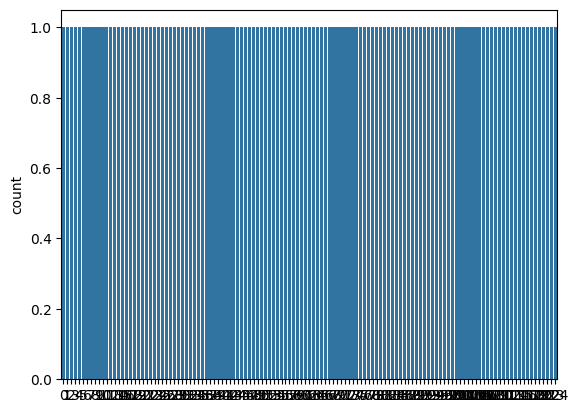

In [15]:
# PLOTTING COUNTS OF SAMPLE LABELLED AS 1 AND 0
sns.countplot(resume_df['class'], label = 'Count Plot')
plt.show()

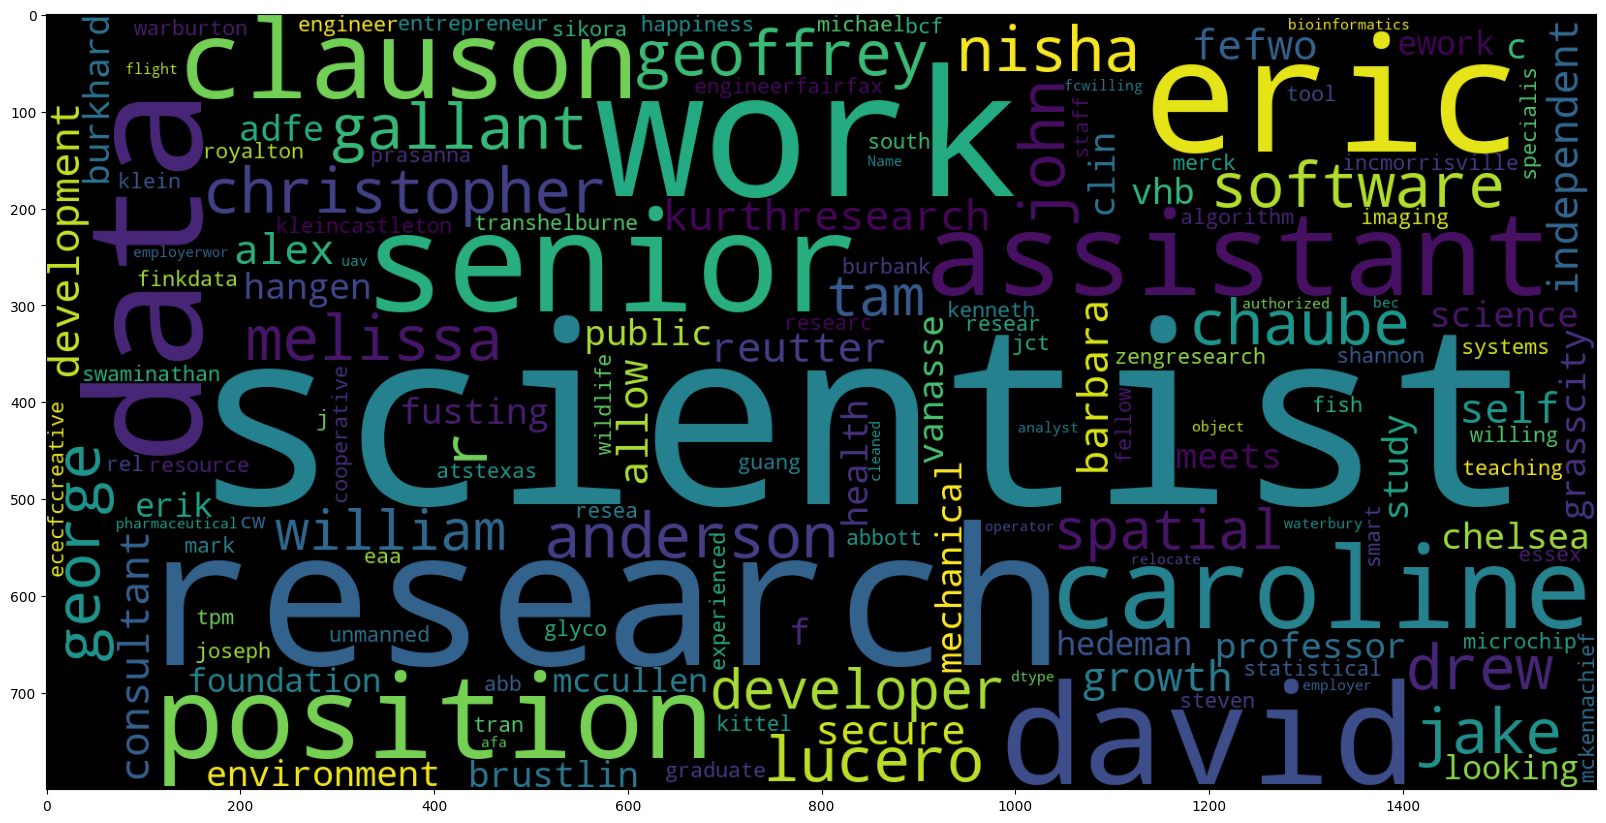

In [16]:
%matplotlib inline

plt.figure(figsize = (20, 20))

wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(resume_df[resume_df['class']==1].cleaned))

plt.imshow(wc)

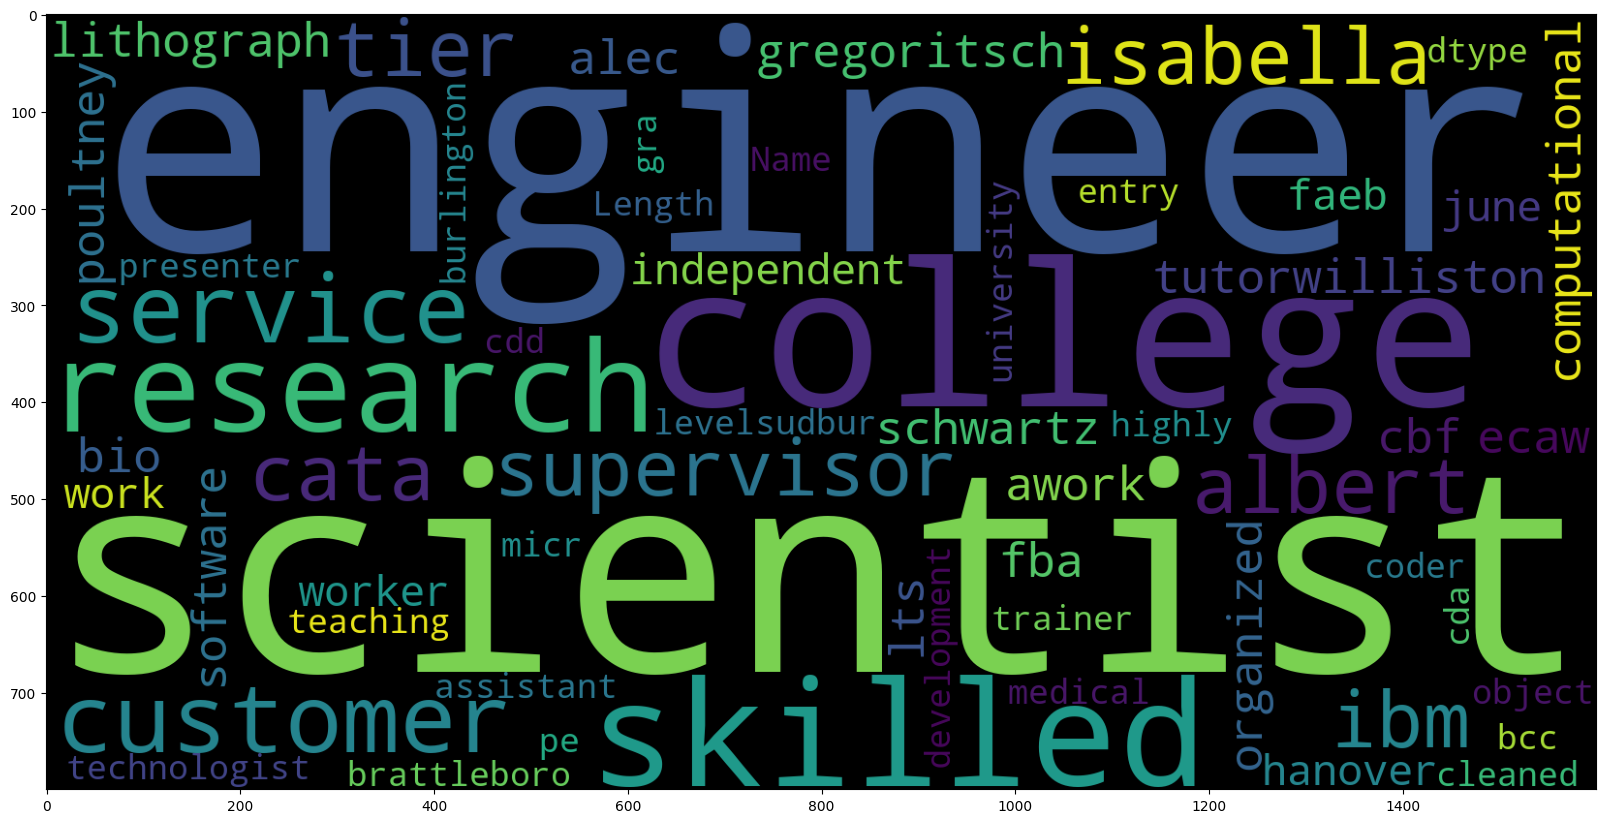

In [17]:
%matplotlib inline

plt.figure(figsize = (20, 20))

wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(resume_df[resume_df['class']==0].cleaned))

plt.imshow(wc)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit_transform(resume_df['cleaned'])

print(vectorizer.get_feature_names_out())

['aaalac' 'aabb' 'aac' ... 'zosia' 'zudaã' 'zurima']


In [22]:
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer  # Assuming text data
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Assuming 'resume_df' is a pandas DataFrame with a 'text' column and a 'class' column
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(resume_df['text'])  # Transform text data into count matrix
y = resume_df['class'].values  # Ensure y is a 1D array-like structure

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Bayes_clf = MultinomialNB(alpha=3)
Bayes_clf.fit(X_train, y_train)  # Training the model


MultinomialNB(alpha=3)

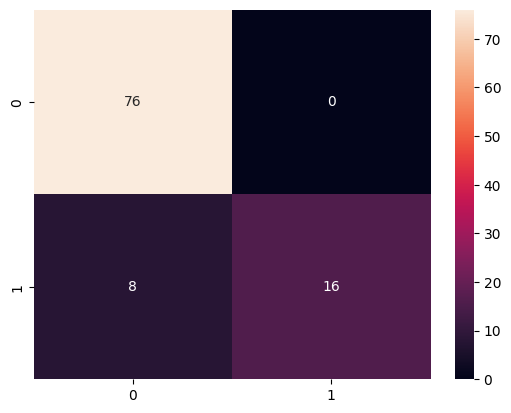

In [24]:
y_pred_train = Bayes_clf.predict(X_train)

cm = confusion_matrix(y_train, y_pred_train)

sns.heatmap(cm, annot=True)

plt.show()

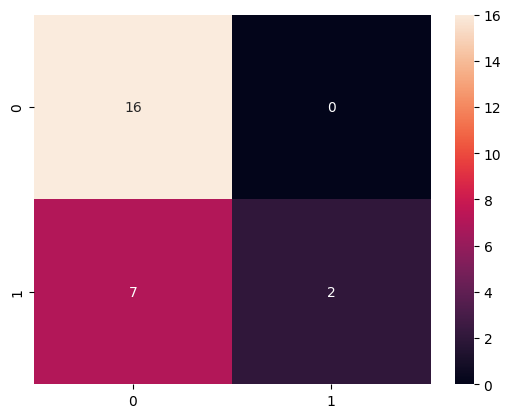

In [25]:
%matplotlib inline

# WE CAN SEE OUR MODEL PERFORMED REALLY WELL ON TRAINING DATA: IT CLASSFIED ALL OF THE POINTS CORRECTLY

# 2) FOR TEST DATA:

y_pred_test = Bayes_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True)

plt.show()

In [26]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        16
           1       1.00      0.22      0.36         9

    accuracy                           0.72        25
   macro avg       0.85      0.61      0.59        25
weighted avg       0.81      0.72      0.66        25



In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy of model on Train Dataset = {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy of model on Test Dataset = {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy of model on Train Dataset = 0.92
Accuracy of model on Test Dataset = 0.72


In [28]:
print("Accuracy of model is = {}".format(accuracy_score(y_test, y_pred_test)))
print("F1 of model is = {}".format(f1_score(y_test, y_pred_test)))
print("Precision of model is = {}".format(precision_score(y_test, y_pred_test)))
print("Recall of model is = {}".format(recall_score(y_test, y_pred_test)))

Accuracy of model is = 0.72
F1 of model is = 0.36363636363636365
Precision of model is = 1.0
Recall of model is = 0.2222222222222222
